**This implementation uses a Genetic Algorithm (GA) with the DEAP (Distributed Evolutionary Algorithms in Python) library to solve the OneMax problem (maximizing the number of 1s in a binary string**

**The goal is to evolve a binary string (individual) so that it contains the maximum number of 1s. The fitness function simply counts the number of 1s in an individual.**

In [1]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [13]:
# Define constants
IND_SIZE = 20 # Size of the individual
POP_SIZE = 100  # Population size
CX_PROB = 0.5  # Crossover probability
MUT_PROB = 0.2  # Mutation probability
N_GEN = 10  # Number of generations

In [14]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [15]:
def evalOneMax(individual):
    return (sum(individual),)  # Maximizing the number of ones

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [16]:
def main():
    pop = toolbox.population(n=POP_SIZE)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CX_PROB, mutpb=MUT_PROB,
                                   ngen=N_GEN, stats=stats, halloffame=hof, verbose=True)
    
    # Find optimal generation
    max_fit = log.select("max")
    optimal_gen = next((i for i, v in enumerate(max_fit) if v == IND_SIZE), N_GEN)
    print(f"Optimal Generation: {optimal_gen}")
    
    # Plot results
    gen = log.select("gen")
    max_fit = log.select("max")
    plt.plot(gen, max_fit, label="Max Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Genetic Algorithm Progress")
    plt.legend()
    plt.show()
    
    return pop, log, hof

gen	nevals	avg  	max
0  	100   	10.07	16 
1  	70    	12.33	16 
2  	57    	13.82	17 
3  	61    	15.11	19 
4  	63    	16.39	20 
5  	61    	17.35	20 
6  	64    	17.88	20 
7  	53    	18.42	20 
8  	63    	19   	20 
9  	54    	19.55	20 
10 	63    	19.66	20 
Optimal Generation: 4


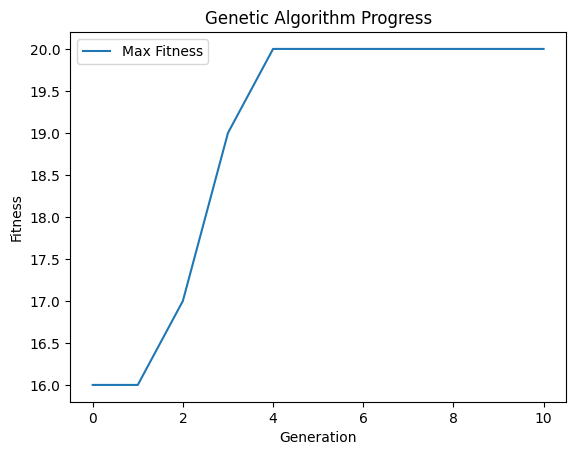

Best Individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [22]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best Individual:", hof[0])